# EDA

---

## Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('data/train-test/app_train.csv')

Utilizing the `pybaseball` library, we were able to acquire game log data of every game from 2015 to 2020, including playoffs. Our model utilizes selected features/columns to predict whether a certain pitch and the factors around it lead to a strike, or some other event. 

In this case, our target variable is aiming towards a "strike_attempt", where it can either be classified as a strike, a ball, an out, or on-base(ob). On-base can either be because the batter got a hit, or was walked to first base.

In [4]:
df['strike_attempt'].unique()

array(['strike', 'ball', 'ob', 'out'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925778 entries, 0 to 3925777
Data columns (total 55 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   game_date              object 
 1   pitch_type             object 
 2   Pitcher_name           object 
 3   pitcher_id             int64  
 4   batter_name            object 
 5   batter_id              int64  
 6   release_speed          float64
 7   release_pos_x          float64
 8   release_pos_z          float64
 9   stand                  int64  
 10  p_throws               int64  
 11  balls                  int64  
 12  strikes                int64  
 13  pfx_x                  float64
 14  pfx_z                  float64
 15  plate_x                float64
 16  plate_z                float64
 17  on_3b                  int64  
 18  on_2b                  int64  
 19  on_1b                  int64  
 20  inning                 int64  
 21  inning_topbot          int64  
 22  effective_speed   

In [7]:
df.describe(include='all')

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
count,3925778,3925778,3925778,3.925778e+06,3925778,3.925778e+06,3.910973e+06,3.902532e+06,3.902532e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.885487e+06,3.766037e+06,3.883811e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3925778,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3925778,3925778,3925778,3925778,1008313,3925778,3925778,694203,3.913604e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.925778e+06
unique,1114,11,1674,NaN,2567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,4,5,14,4,35,19,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-09-04,FF,Max Scherzer,NaN,J.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-Seam Fastball,NaN,NaN,NaN,NaN,Standard,Standard,0-0,strike,field_out,ball,S,ground_ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5640,1388429,18341,NaN,25957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1388429,NaN,NaN,NaN,NaN,2838462,3571565,1009010,1804613,401696,1317497,1804682,314059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.403311e+05,NaN,5.347084e+05,8.868567e+01,-7.793901e-01,5.919715e+00,5.813979e-01,7.294465e-01,8.842978e-01,8.876961e-01,-1.928299e-01,7.733834e-01,1.884104e-02,2.279551e+00,5.051610e+04,9.879194e+04,1.619614e+05,4.998506e+00,5.092058e-01,8.819325e+01,2.211626e+03,6.038816e+00,5.165356e+05,5.142169e+05,5.445410e+05,5.395915e+05,5.568228e+05,5.343705e+05,5.481872e+05,5.326239e+05,3.908339e+01,2.904070e+00,NaN,2.291132e+00,2.331207e+00,2.291209e+00,2.331207e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.288409e+00,-1.288765e+02,-4.357640e+00,-2.352538e+00,2.632440e+01,-2.296656e+01,9.812009e-01
std,NaN,NaN,NaN,7.830241e+04,NaN,8.158190e+04,6.025909e+00,2.015019e+01,3.368651e+01,4.933300e-01,4.442458e-01,9.672773e-01,8.257246e-01,1.021488e+00,1.013376e+00,2.048049e+01,3.217943e+01,1.585875e+05,2.106543e+05,2.495596e+05,2.666002e+00,4.999153e-01,6.576435e+00,3.349139e+02,5.147727e-01,7.962577e+04,7.851485e+04,7.847754e+04,9.531888e+04,7.987036e+04,9.523073e+04,7.822602e+04,8.938566e+04,2.311444e+01,1.731435e+00,NaN,2.589246e+00,2.676471e+00,2.589280e+00,2.676471e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.983404e+00,8.730541e+00,3.076268e+00,1.063525e+01,4.081825e+00,8.880890e+00,8.177113e-01
min,NaN,NaN,NaN,1.125260e+05,NaN,1.125260e+05,3.610000e+01,-2.521450e+04,-3.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.013900e+03,-1.600000e+01,-2.642677e+04,-2.848000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.130000e+02,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.718084e+01,-7.721720e+02,-7.512015e+01,-1.279061e+02,-8.386989e+01,-1.843371e+02,0.000000e+00
25%,NaN,NaN,NaN,4.771320e+05,NaN,4.621010e+05,8.460000e+01,-2.130000e+00,5.630000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,3.000000e-01,-5.800000e-01,1.640000e+00,

In order to understand the data, prior to modeling, we have to look at what the data possibly looks like.

In [8]:
df.head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
0,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,96.1,-1.92,5.95,1,1,1,2,-0.27,1.70,-0.93,1.62,0,624424,0,12,0,95.4,2463.0,6.4,460077,543333,450314,519058,444876,460086,456715,449181,94,6,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,strikeout,called_strike,S,NaN,3.075,-139.609,-9.724,-2.028,34.780,-11.706,2
1,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.1,-1.50,6.02,1,1,1,2,0.24,0.72,0.78,1.55,0,624424,0,12,0,92.2,2705.0,5.9,460077,543333,450314,519058,444876,460086,456715,449181,94,5,Cutter,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,5.156,-135.442,-7.227,5.004,28.835,-25.323,2
2,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.0,-1.37,6.08,1,1,1,2,-0.50,1.41,1.32,2.47,0,624424,0,12,0,96.4,2362.0,6.3,460077,543333,450314,519058,444876,460086,456715,449181,94,4,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,8.459,-140.843,-7.313,-5.412,31.551,-15.189,2
3,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.6,-1.25,6.06,1,1,0,2,0.32,0.80,2.92,2.23,0,0,624424,12,0,92.8,2724.0,6.0,460077,543333,450314,519058,444876,460086,456715,449181,94,3,Cutter,2,7,2,7,Strategic,Strategic,0-2,ball,NaN,ball,B,NaN,10.094,-135.734,-5.821,6.079,26.355,-24.250,2
4,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.1,-1.49,6.08,1,1,0,1,-0.76,1.63,0.26,2.74,0,0,624424,12,0,96.0,2401.0,6.1,460077,543333,450314,519058,444876,460086,456715,449181,94,2,4-Seam Fastball,2,7,2,7,Strategic,Standard,0-1,strike,NaN,foul,S,NaN,6.519,-140.993,-7.138,-9.148,32.251,-11.956,2


# The Many Types of Pitches

---
In order to understand what is a strike, we must look at the different types of pitches out there, or at least in this data.

In [10]:
df['pitch_name'].value_counts(normalize=True)

4-Seam Fastball     0.353670
Slider              0.161244
Changeup            0.104666
2-Seam Fastball     0.102200
Sinker              0.089903
Curveball           0.082651
Cutter              0.056347
Knuckle Curve       0.024601
Split-Finger        0.015163
Unknown             0.004377
Knuckleball         0.002923
Intentional Ball    0.001628
Eephus              0.000221
Forkball            0.000216
Pitch Out           0.000160
Screwball           0.000029
Fastball            0.000003
Name: pitch_name, dtype: float64

I am not surprised that the 4-seam fastball is the pitch that is most often thrown. The idea of being able to throw a pitch very fast is one of the few traits a pitcher needs to have in order to make in the big leagues. 

In [13]:
# View the Small Anomoly
df[df['pitch_name']=='Fastball']

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
398463,2015-06-26,U,Johnny Cueto,456501,Noah Syndergaard,592789,92.0,-1.37,5.98,0,1,1,2,-0.88,1.42,0.93,3.72,0,0,0,3,0,89.9,2229.0,5.7,430910,458015,408252,453943,553993,458689,571740,457803,20,4,Fastball,1,1,1,1,Standard,Standard,1-2,ball,NaN,ball,B,NaN,7.879000,-133.727000,-2.674000,-9.644000,33.346000,-16.998000,0
398579,2015-06-26,U,Trevor Rosenthal,572096,Anthony Rizzo,519203,89.5,-0.56,5.84,0,1,1,2,-1.76,1.37,-0.72,1.28,0,0,0,9,1,88.7,1512.0,5.7,425877,448602,543939,572761,425509,545341,445055,518792,70,4,Fastball,2,2,2,2,Standard,Standard,1-2,strike,NaN,foul,S,NaN,3.496000,-130.021000,-8.114000,-19.895000,28.610000,-18.183000,1
398878,2015-06-26,U,Bruce Rondon,541652,Adam LaRoche,425560,88.7,-1.69,5.83,0,1,0,0,-1.69,0.71,-1.13,1.89,0,0,0,8,1,88.0,1946.0,6.0,592407,408234,435079,592206,578428,493316,434658,502110,63,1,Fastball,4,4,4,4,Infield shift,Strategic,0-0,ball,NaN,ball,B,NaN,5.137000,-128.989000,-4.920000,-18.928000,25.689000,-26.125000,1
461897,2015-06-10,U,Jose Quintana,500779,Evan Gattis,594828,89.1,2.27,5.85,1,0,0,1,0.85,1.04,0.89,2.50,514888,605512,0,1,1,89.4,1404.0,6.9,434567,547989,466988,543216,493596,466320,543776,541645,4,2,Fastball,0,0,0,0,Standard,Standard,0-1,strike,NaN,foul,S,NaN,-5.825000,-129.550000,-4.160000,11.819000,30.464000,-22.249000,1
480631,2015-06-05,U,Aaron Sanchez,592717,Jonathan Villar,542340,92.1,-1.24,5.97,0,1,1,2,-1.58,0.66,-0.07,2.42,0,0,0,9,1,91.5,2240.0,6.5,431145,475253,572365,518626,408314,485567,607680,430832,63,4,Fastball,1,6,1,6,Standard,Standard,1-2,ob,single,hit_into_play_no_out,X,line_drive,6.628000,-134.036000,-4.353000,-18.695000,32.132000,-26.329000,0
572356,2015-05-12,U,Lance Lynn,458681,Jason Kipnis,543401,89.3,-1.92,5.68,0,1,0,0,-0.72,1.04,-0.68,2.61,0,0,0,1,0,89.5,2243.0,5.6,425877,571431,543939,572761,425509,407812,488721,518792,4,1,Fastball,0,0,0,0,Standard,Standard,0-0,strike,NaN,called_strike,S,NaN,4.663000,-129.965000,-3.804000,-7.467000,19.052000,-21.717000,0
605709,2015-05-04,U,Carlos Martinez,593372,Anthony Rizzo,519203,88.0,-0.34,6.09,0,1,2,2,-1.34,1.01,-1.17,2.19,0,451594,458085,1,1,86.5,2103.0,5.4,488810,448602,543939,572761,425509,407812,445055,518792,3,6,Fastball,0,0,0,0,Standard,Standard,2-2,out,field_out,hit_into_play,X,fly_ball,0.669808,-127.934795,-5.281346,-14.425934,26.653169,-20.645613,0
647010,2015-04-23,U,Chris Sale,519242,Eric Hosmer,543333,89.5,2.47,5.24,0,0,0,1,1.65,0.63,1.03,2.40,0,0,0,3,1,88.7,1974.0,6.4,452095,547989,608672,543216,493351,466320,594809,541645,19,2,Fastball,2,0,2,0,Standard,Standard,0-1,ob,single,hit_into_play_no_out,X,ground_ball,-7.865000,-130.150000,-1.920000,21.415000,33.233000,-27.042000,2
647068,2015-04-23,U,Chris Sale,519242,Alex Gordon,460086,89.5,2.40,4.95,0,0,1,1,1.43,0.71,-0.87,1.63,0,543333,434778,1,1,87.6,1988.0,6.1,452095,547989,608672,543216,493351,466320,594809,541645,6,3,Fastball,2,0,2,0,Strategic,Standard,1-1,strike,NaN,swinging_strike,S,NaN,-11.928000,-129.828000,-3.238000,18.558000,34.709000,-26.227000,1
667089,2015-04-18,U,Anibal Sanchez,434671,Conor Gillaspie,543216,89.3,0.06,6.05,0,1,1,1,0.14,0.99,0.07,2.71,0,0,0,3,1,89.1,2550.0,6.0,543510,408234,435079,541650,578428,493316,434658,502110,23,3,Fastball,4,1,4,1,Infield shift,Standard,1-1,strike,NaN,foul,S,NaN,-0.613000,-129.981000,-4.288000,3.367000,22.055000,-22.532000,2


Looking at the fact that the pitchers are actually recognized pitchers by MLB standards, I am surprised they couldn't specify what Fastball was thrown by these pitchers. I assumed that the people who threw these "unidentified" fastballs were position players pitching in a blowout game or Chris Davis from the Baltimore Orioles. If you don't know who he is, he is probably one of the worst hitters in baseball right now but he did have an immaculate pitching relief which lead their team to a victory. Or Russell Martin for his stint with the Dodgers in 2019. Examples of position players pitching [here](https://www.youtube.com/watch?v=0tL3JDgwmF8). This is Chris Davis actually winning as a pitcher [here](https://www.youtube.com/watch?v=H7hXOxrozxM&t=18s).

In [15]:
df[df['pitch_name']=='Screwball']

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
152328,2015-08-31,U,Hector Santiago,502327,Billy Burns,542993,78.6,2.90,5.87,1,0,0,0,1.44,0.99,0.66,3.11,0,0,0,1,0,76.5,1921.0,4.9,455104,405395,502205,592230,430947,425664,545361,594777,8,1,Screwball,0,1,0,1,Standard,Standard,0-0,strike,NaN,swinging_strike,S,NaN,-8.385000,-114.249000,-0.750000,14.999000,20.468000,-24.790000,0
254965,2015-08-05,U,Hector Santiago,502327,Carlos Santana,467793,79.2,3.34,5.85,1,0,0,2,1.08,0.62,2.53,2.72,608070,0,0,1,1,77.2,1671.0,5.2,455104,543068,543213,543216,430947,461815,545361,594777,4,3,Screwball,0,0,0,0,Standard,Standard,0-2,ball,NaN,ball,B,NaN,-4.408000,-115.232000,-0.930000,11.647000,22.129000,-28.155000,2
296837,2015-07-25,U,Hector Santiago,502327,Shin-Soo Choo,425783,83.2,2.53,5.62,0,0,1,0,0.19,0.45,-1.65,0.97,0,0,0,4,1,81.3,2149.0,5.3,455104,405395,543213,543216,430947,605323,545361,594777,33,2,Screwball,1,4,1,4,Infield shift,Standard,1-0,ball,NaN,ball,B,NaN,-10.681000,-120.535000,-4.922000,3.399000,21.990000,-29.563000,2
368286,2015-07-04,U,Hector Santiago,502327,Mitch Moreland,519048,82.3,3.08,5.62,0,0,2,2,0.34,0.50,-0.12,2.21,0,596059,134181,1,0,81.2,2214.0,5.4,455104,405395,543213,501896,430947,543706,545361,594777,9,6,Screwball,0,0,0,0,Strategic,Standard,2-2,strike,NaN,foul,S,NaN,-8.638000,-119.467000,-2.013000,4.944000,18.992000,-29.006000,2
435008,2015-06-17,U,Hector Santiago,502327,Nick Ahmed,605113,80.1,2.58,5.70,1,0,0,0,1.37,0.64,-0.57,1.30,0,0,0,4,0,78.6,1780.0,5.4,455104,405395,543213,501896,430947,459964,545361,594777,31,1,Screwball,3,0,3,0,Standard,Standard,0-0,ball,NaN,ball,B,NaN,-10.428000,-116.105000,-4.017000,14.732000,21.424000,-27.898000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715826,2018-05-16,U,Hector Santiago,502327,David Freese,501896,78.3,2.23,5.75,1,0,1,2,1.40,0.20,0.64,2.06,0,0,621559,1,0,77.0,1967.0,5.4,553882,547989,660162,571602,570560,547170,641553,544725,8,4,Screwball,0,0,0,0,Standard,Standard,1-2,out,grounded_into_double_play,hit_into_play,X,ground_ball,-5.893011,-113.772377,-1.504811,13.216223,20.109432,-30.161137,1
2735951,2018-05-11,U,Hector Santiago,502327,Kyle Schwarber,656941,78.7,2.16,6.02,0,0,1,1,1.30,1.10,0.56,3.85,0,592178,519203,2,0,76.9,1845.0,5.3,456078,547989,570560,571602,641313,547170,544725,594953,20,3,Screwball,5,0,5,0,Strategic,Standard,1-1,ball,NaN,ball,B,NaN,-5.726104,-114.201358,0.220863,12.274392,22.344252,-23.292840,2
2801153,2018-04-24,U,Hector Santiago,502327,Nelson Cruz,443558,77.7,2.56,5.56,1,0,0,1,1.40,0.60,-0.86,1.61,0,0,0,6,1,75.8,2316.0,5.4,456078,547989,660162,570560,641313,544725,641553,572204,42,2,Screwball,1,0,1,0,Infield shift,Strategic,0-1,ball,NaN,ball,B,NaN,-9.653832,-112.449324,-2.484785,13.548895,22.158218,-26.782083,2
2801163,2018-04-24,U,Hector Santiago,502327,Jean Segura,516416,78.2,2.72,5.69,1,0,0,2,1.10,0.60,1.24,2.28,0,0,0,6,1,77.2,1835.0,5.5,456078,547989,660162,570560,641313,544725,641553,572204,40,3,Screwball,1,0,1,0,Standard,Standard,0-2,strike,NaN,foul,S,NaN,-5.103891,-113.688504,-1.543935,10.366223,19.800242,-27.139528,0


In [16]:
pitcher_att = df.groupby(['Pitcher_name','pitch_name']).size()/df.groupby(['Pitcher_name']).size()
pitcher_att_df = pd.DataFrame(pitcher_att)

pitcher_att_df.rename(columns={0:'pitch_usage'}, inplace=True)

In [17]:
pitcher_att_df

pitch_usage
Pitcher_name pitch_name                   
A.J. Achter  2-Seam Fastball      0.124372
             4-Seam Fastball      0.327889
             Changeup             0.353015
             Cutter               0.071608
             Intentional Ball     0.006281
...                                    ...
Zack Wheeler Curveball            0.107809
             Sinker               0.029371
             Slider               0.192006
             Split-Finger         0.042962
             Unknown              0.000691

[9415 rows x 1 columns]

The dataframe above is the entire list of pitchers (or position players) that have pitched between 2015-2020. This data shows how often a pitcher used a particular pitch out of all the pitches that they have thrown. This also helps us understand what is in the pitch repertoir of a particular pitcher and create a unique identifier of a pitcher without having to dummify or utilize the ID. For example, we will look at Clayton Kershaw's repertoir.

In [18]:
pitcher_att_df.loc['Clayton Kershaw']

,pitch_usage
pitch_name,
2-Seam Fastball,0.011581
4-Seam Fastball,0.459906
Changeup,0.004632
Curveball,0.166260
Intentional Ball,0.000313
Slider,0.345415
Unknown,0.011894


Kershaw utilizes a lot of 4-seam fastballs in his mix of pitches. However, what seems to be particularly high is his use of the slider and the curveball. These are his most popular off-speed pitches. This is his style, his way of pitching. He will have you think about his fast ball a lot of the time and then boom when the count is in the Kershaw's favor, he will get you out with an off-speed. This is probably different from his fellow teammate, and closer, Kenley Jansen. Kenley is reliant on his cutter to go fast and cut into the inside of a batter if they are lefty, or outside and away from a right-handed batter. The lateral movement of a cutter is what makes that particular fastball very devestating. Look [here](https://www.youtube.com/watch?v=dMVXjRGTtG0) for more information about cutters versus fastballs.

In [19]:
pitcher_att_df.loc['Kenley Jansen']

,pitch_usage
pitch_name,
4-Seam Fastball,0.047995
Cutter,0.752778
Intentional Ball,0.002255
Pitch Out,0.000161
Sinker,0.081495
Slider,0.108713
Unknown,0.006603


In [22]:
# We update what the pitcher_att_df looks like
pitcher_att_df=pitcher_att_df.reset_index().pivot(index='Pitcher_name', columns='pitch_name', values='pitch_usage').fillna(0).reset_index()

In [23]:
pitcher_att_df.head()

pitch_name,Pitcher_name,2-Seam Fastball,4-Seam Fastball,Changeup,Curveball,Cutter,Eephus,Fastball,Forkball,Intentional Ball,Knuckle Curve,Knuckleball,Pitch Out,Screwball,Sinker,Slider,Split-Finger,Unknown
0,A.J. Achter,0.124372,0.327889,0.353015,0.000000,0.071608,0.0,0.0,0.0,0.006281,0.0000,0.0,0.001256,0.0,0.0000,0.115578,0.0,0.000000
1,A.J. Burnett,0.000000,0.116800,0.087600,0.000000,0.000000,0.0,0.0,0.0,0.003200,0.2924,0.0,0.000400,0.0,0.4992,0.000000,0.0,0.000400
2,A.J. Cole,0.099433,0.367989,0.057224,0.128612,0.011331,0.0,0.0,0.0,0.001416,0.0000,0.0,0.000283,0.0,0.0000,0.330595,0.0,0.003116
3,A.J. Griffin,0.004431,0.535303,0.100739,0.233087,0.022157,0.0,0.0,0.0,0.001182,0.0000,0.0,0.000591,0.0,0.0000,0.102216,0.0,0.000295
4,A.J. Minter,0.000414,0.445319,0.091964,0.000000,0.451118,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.0000,0.000414,0.0,0.010771


In [27]:
len(pitcher_att_df.columns[1:])

17

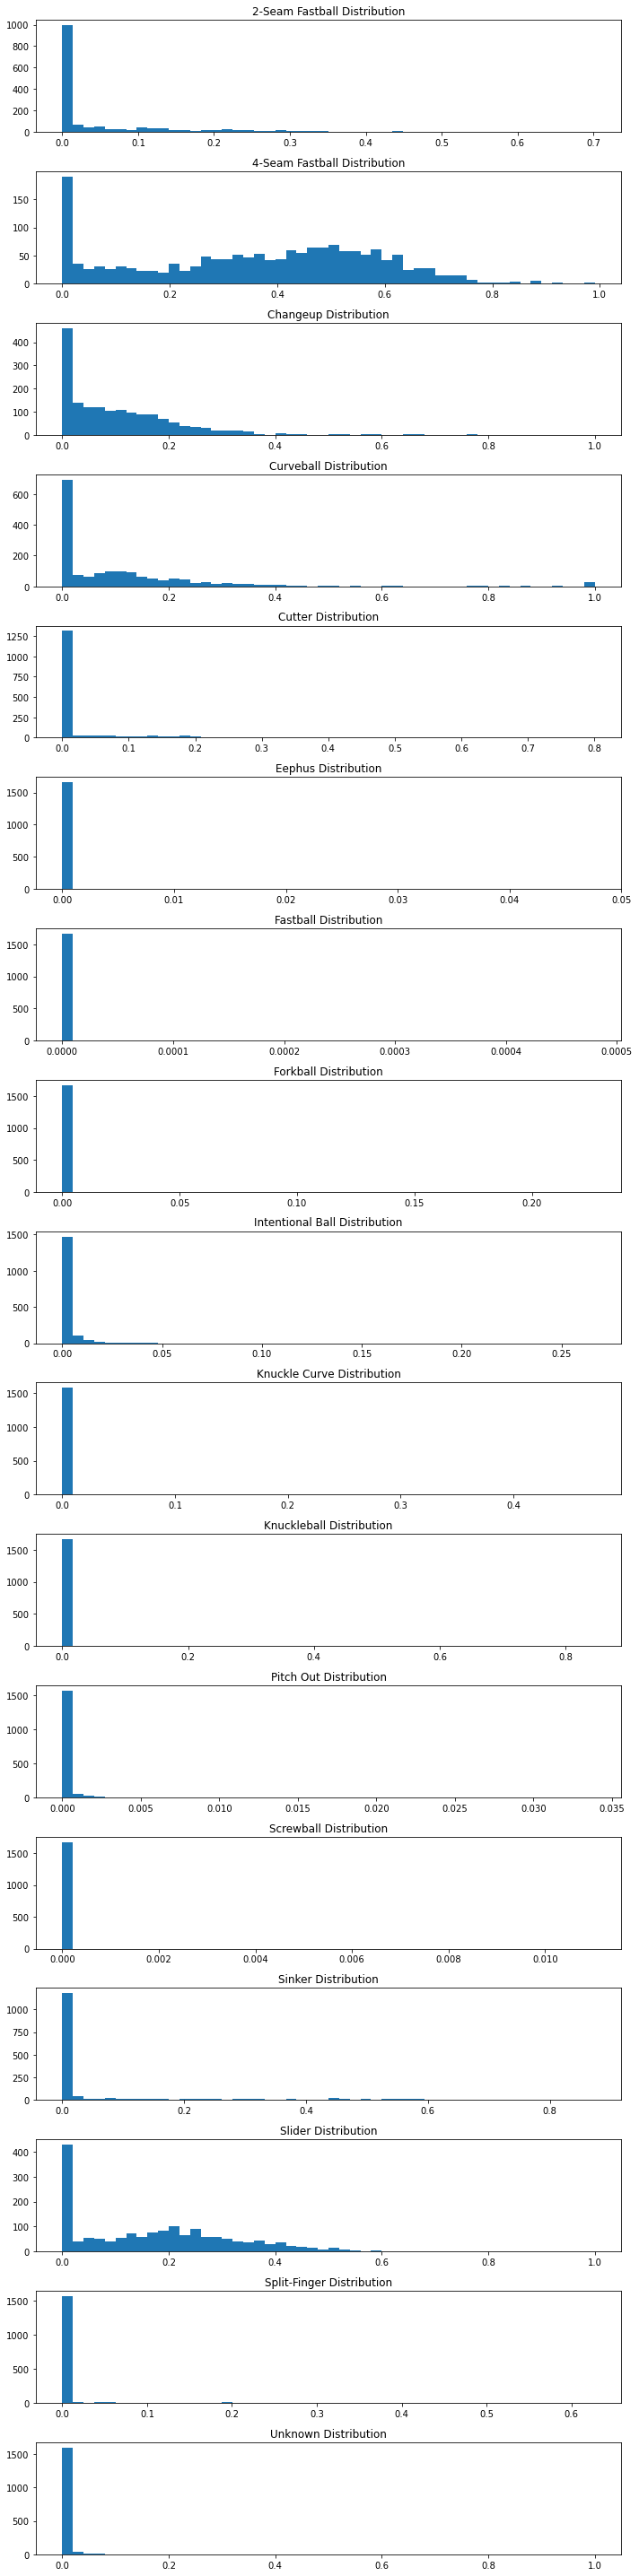

In [43]:
fig, axs = plt.subplots(nrows=len(pitcher_att_df.columns[1:]), tight_layout=True)
fig.set_figheight(40)
fig.set_figwidth(10)

count = 0
for col in pitcher_att_df.columns[1:]:
    axs[count].hist(pitcher_att_df[col], bins=50)
    axs[count].title.set_text(f'{col} Distribution')
    count += 1

The slider and the 4-seam fastball are the most used overall just by looking at the distribution of pitches. This includes relief pitchers who don't stay on the mound for very long or position players who never expect to be on the mound. The change up is growing in steady users but that shows that the pitching rotation for most teams involve having to rely on the 4-seam to eat up innings and more than likely induce fly balls or grounders.

In [53]:
df.groupby('pitch_name').agg({'release_speed': ['mean', 'count', 'min', 'max']})
# Thank you Sid for this code from the group project

release_speed                      
                          mean    count   min    max
pitch_name                                          
2-Seam Fastball      92.537845   401214  63.6  102.5
4-Seam Fastball      93.257928  1388429  50.6  105.7
Changeup             84.246183   410894  46.3   97.8
Curveball            78.211310   324468  38.1   98.0
Cutter               88.528837   221204  48.0  101.4
Eephus               67.100923      867  46.7   84.2
Fastball             89.700000       10  88.0   92.1
Forkball             86.499764      848  78.5   91.9
Intentional Ball     73.212269     6390  45.4   92.7
Knuckle Curve        80.836908    96577  56.9   91.6
Knuckleball          76.083635    11476  50.7   83.2
Pitch Out            86.907302      630  52.2   98.0
Screwball            78.646018      113  71.9   83.2
Sinker               92.014507   352940  70.3  105.0
Slider               84.641159   633008  45.1   99.6
Split-Finger         85.026801    59527  72.2   96.3
Unknown              84.933305     2378  36.1  102.0

# Qualified Pitchers

---
Since I talked about position players as pitchers, I decided to determine how many of these pitchers are actually qualified. To be considered a qualified pitcher. To be qualified, they have to have thrown at least 100 pitches.

In [58]:
df.groupby('Pitcher_name').agg({'Pitcher_name': ['count']}) < 100 
# Use as a filter to get all "pitcher" who pitched less than 100

# Look at strikes, who throws more strikes, who takes more strikes, etc.

,Pitcher_name
,count
Pitcher_name,
A.J. Achter,False
A.J. Burnett,False
A.J. Cole,False
A.J. Griffin,False
A.J. Minter,False
...,...
Zack Godley,False
Zack Greinke,False
